#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("imdb_top_10000.txt", delimiter='\t',names=['imdbID','title','year','score','votes','runtime','genres'])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [2]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [3]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [4]:
df[df.genres.isna()==True]

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [5]:
df.shape

(10000, 7)

In [6]:
df.dropna(subset=['genres'], inplace=True)
df.shape

(9999, 7)

## 2. Asking Questions

In [7]:
#best movie in terms of score

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [8]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [9]:
runtime = [int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime'] = runtime
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [10]:
genre_set = set()
for genre in df.genres:
  genre_set.update(genre.split('|'))

In [11]:
len(genre_set)

24

In [12]:
for genre in genre_set:
  df[genre] = [genre in row.split("|") for row in df.genres]

In [13]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Fantasy  Romance   News  ...  Adventure  \
0                       Crime|Drama    False    False  False  ...      False   
1                    Crime|Thriller    False    False  False  ...      False   
2            Drama|Mystery|Thriller    False    False  False  ...      False   
3           Action|Adventure|Sci-Fi    False    False  False  ...       True   
4  Action|Adventure|Sci-Fi|Thriller    False    False  False  ...       True   

   Family  Adult  Biography  Thriller  Mystery  Horror  History  Drama  Comedy  
0   False  False      False     False    False   False    False   True   False  
1   False  False      False      True    False   False    False  False   False  
2   False  False      False      True     True   False    False   True   False  
3   False  False      False     False    False   False    False  False   False  
4   False  False      False      True    False   False    False  False   False  

[5 rows x 31 columns]

## 4. EDA

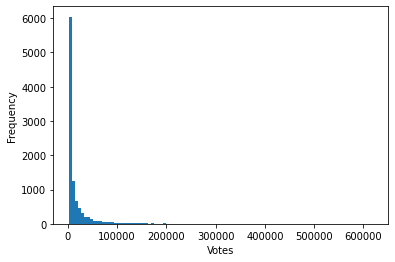

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df.votes
plt.hist(x,bins=100)
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()


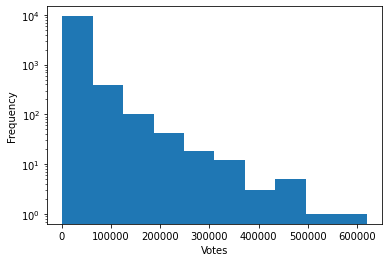

In [19]:
x = df.votes
plt.hist(x,bins=10,log=True)
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()

Barplot

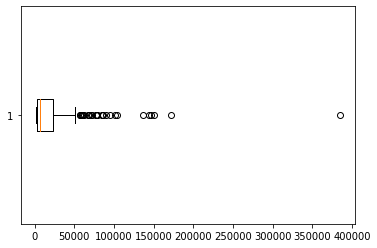

In [24]:
yeardf = df.groupby("year")
df2010 = yeardf.get_group(2010)
plt.boxplot(df2010.votes,vert=False)
plt.show()

Multivariate(Bivariate)

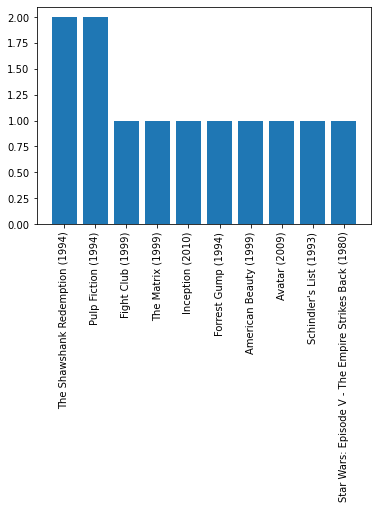

In [25]:
x = df.title.unique()[:10]
y = df.title.value_counts()[:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

## 5. Determining Best Movies

In [23]:
movies = df.groupby('year', sort = False)
year_1994 = movies.get_group(1994)
best_movie = year_1994[year_1994['score']==year_1994.score.max()]
print(best_movie)


      imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   

        genres  Fantasy  Romance   News  ...  Adventure  Family  Adult  \
0  Crime|Drama    False    False  False  ...      False   False  False   

   Biography  Thriller  Mystery  Horror  History  Drama  Comedy  
0      False     False    False   False    False   True   False  

[1 rows x 31 columns]


## 6. Trends in Popularity of Genres

In [15]:
genredf = df[list(genre_set)]
genredf.head()

Fantasy  Romance   News  Western  Crime    War  Action  Musical  Film-Noir  \
0    False    False  False    False   True  False   False    False      False   
1    False    False  False    False   True  False   False    False      False   
2    False    False  False    False  False  False   False    False      False   
3    False    False  False    False  False  False    True    False      False   
4    False    False  False    False  False  False    True    False      False   

   Sci-Fi  ...  Adventure  Family  Adult  Biography  Thriller  Mystery  \
0   False  ...      False   False  False      False     False    False   
1   False  ...      False   False  False      False      True    False   
2   False  ...      False   False  False      False      True     True   
3    True  ...       True   False  False      False     False    False   
4    True  ...       True   False  False      False      True    False   

   Horror  History  Drama  Comedy  
0   False    False   True   False  
1   False    False  False   False  
2   False    False   True   False  
3   False    False  False   False  
4   False    False  False   False  

[5 rows x 24 columns]

In [16]:
genre_result = genredf.sum()
y = genre_result.sort_values(ascending=False)[:10]
x = y.index

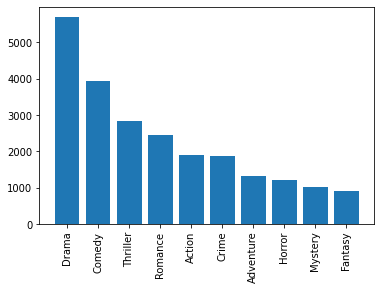

In [17]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()